# ECE-253 Homework 1
## Haonan Peng
## PID:A14765890


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Problem 1.Basis

In [3]:
A = [[3,9,5,1],[4,25,4,3],[63,13,23,9],[6,32,77,0],[12,8,6,1]]
B = [[0,1,0,1],[0,1,1,0],[0,0,0,1],[1,1,0,1],[0,1,0,0]] 

#### (i) Point-wise multiply A with B and set it to C.

In [4]:
C = np.multiply(A,B)
print(C)

[[ 0  9  0  1]
 [ 0 25  4  0]
 [ 0  0  0  9]
 [ 6 32  0  0]
 [ 0  8  0  0]]


#### (ii) Calculate the inner product of the 2nd and 3rd row of C.

In [5]:
dot2n3 = np.dot(C[1,:],C[2,:])
print('The inner product of the 2nd and 3rd row of C is',dot2n3)

The inner product of the 2nd and 3rd row of C is 0


#### (iii) Find the minimum and maximum values and their corresponding row and column indices in matrix C. If there are multiple min/max values, you must list all their indices.

In [6]:
i_max,j_max = np.where(C == C.max())
i_min,j_min = np.where(C==C.min())
                       
maxIndice = list(zip(i_max,j_max))
print('The indices of the max value is: ',maxIndice)
minIndices = list(zip(i_min,j_min))
print('The indices of the min values are: ',minIndices)

The indices of the max value is:  [(3, 1)]
The indices of the min values are:  [(0, 0), (0, 2), (1, 0), (1, 3), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (4, 0), (4, 2), (4, 3)]


# Problem 2. Simple image manipulation

#### (i) Download any color image from the Internet or use one of the given images. Read this image and call it A.

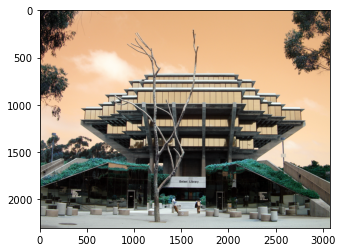

In [7]:
A = cv2.imread('geisel.jpg')
plt.imshow(A)

#### (ii) Transform the color image to gray-scale. Verify the values are between 0 and 255. If not, please normalize your image from 0 to 255. Call this image B.

(2304, 3072, 3) uint8
(2304, 3072) uint8
255 0


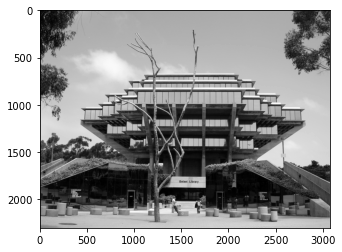

In [8]:
B = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
plt.imshow(B,cmap='gray')

print(A.shape,A.dtype)
print(B.shape,B.dtype)
print(B.max(),B.min())

#### (iii) Add 15 to each value of image B. Set all pixel values greater than 255 to 255. Call this image C.

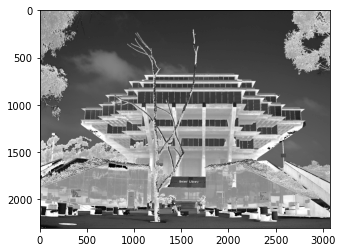

In [9]:
temp = np.int8(B)+128
C = temp+15

gt255 = np.where(C>255)
C[gt255] = 255
            
plt.imshow(C,cmap='gray')

#### (iv) Flip image B along both the horizontal and vertical axis. Call this image D.

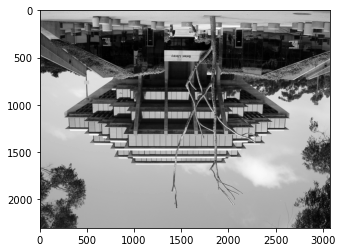

In [10]:
D = cv2.flip(B,-1)
plt.imshow(D,cmap='gray')

#### (v) Calculate the median of all values in image B. Next, threshold image B by the median value you just calculated i.e. set all values greater than median to 0 and set all values less than or equal to the median to 1. Name this binary image E.

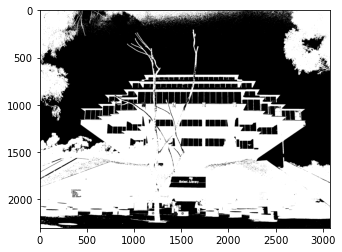

In [11]:
th = np.median(B)
gtTh = np.where(B>th)
leTh = np.where(B<=th)
E = np.copy(B)

E[gtTh] = 0
E[leTh] = 1

plt.imshow(E,cmap='gray')            

In [12]:
print(gtTh)
len(gtTh)

(array([   0,    0,    0, ..., 2303, 2303, 2303], dtype=int64), array([  97,   98,  104, ..., 3069, 3070, 3071], dtype=int64))


2

## Problem 3. Histograms

In [13]:
def compute_norm_rgb_histogram(img):
    R = []
    G = []
    B = []
    imgR = img[:,:,0]
    imgG = img[:,:,1]
    imgB = img[:,:,2]
    
    for i in range(32):
        tempR = imgR[imgR >= i*8]
        R.append(len(tempR[tempR < (i+1)*8]))
        
        tempG = imgG[imgG >= i*8]
        G.append(len(tempG[tempG < (i+1)*8]))
        
        tempB = imgB[imgB >= i*8]
        B.append(len(tempB[tempB < (i+1)*8]))
        
    R = [r/sum(R) for r in R]
    G = [g/sum(G) for g in G]
    B = [b/sum(B) for b in B]
    
    RGB = np.concatenate((R,G,B),axis = None)
    return RGB

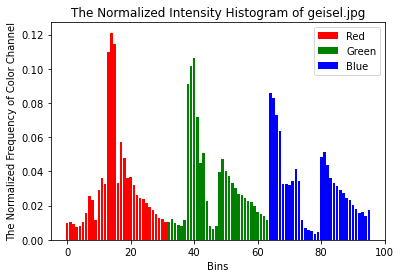

In [14]:
img = np.int8(A) + 128
rgb = compute_norm_rgb_histogram(img)

plt.bar(range(0,32),rgb[0:32],color='red')
plt.bar(range(32,64),rgb[32:64],color='green')
plt.bar(range(64,96),rgb[64:96],color='blue')
plt.title('The Normalized Intensity Histogram of geisel.jpg')
plt.xlabel('Bins')
plt.ylabel('The Normalized Frequency of Color Channel')
plt.legend(['Red','Green','Blue'])

## Problem 4. Chroma Keying

In [22]:
def chromaKeying(img):
    crop1 = np.zeros(img.shape[0:2])
    crop2 = np.zeros(img.shape)
    for i in range(len(img)):
        for j in range(len(img[1])):
            if img[i][j][1]>140 and (img[i][j][0]<120 and img[i][j][2]<200):
                crop1[i][j] = 0
                crop2[i][j] = [0,0,0]
            else:
                crop1[i][j] = 255
                crop2[i][j] = img[i][j]
    
    return crop1.astype(int),crop2.astype(int)

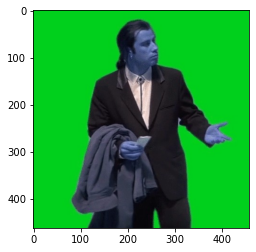

In [23]:
img = cv2.imread('travolta.jpg')

plt.imshow(img)

In [24]:
test1,test2 = chromaKeying(img)

Text(0.5, 1.0, 'Transform Shown in Grayscale')

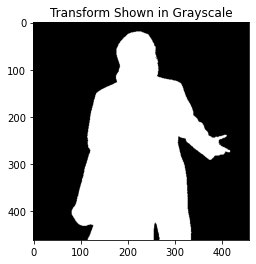

In [25]:
plt.imshow(test1,cmap='gray')
plt.title('Transform Shown in Grayscale')

Text(0.5, 1.0, 'Transform Shown in RGB')

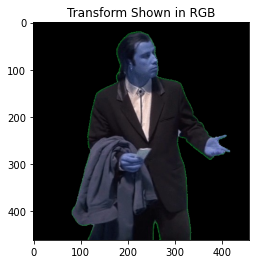

In [26]:
plt.imshow(test2)
plt.title('Transform Shown in RGB')

In [33]:
background = cv2.imread('geisel.jpg')

for i in range(len(test2)):
    for j in range(len(test2[1])):
        if test2[i][j][1] != 0:
            background[i+len(test2)][j+len(test2[1])*3] = test2[i][j]

Text(0.5, 1.0, 'Transform Shown in the Background of Geisel')

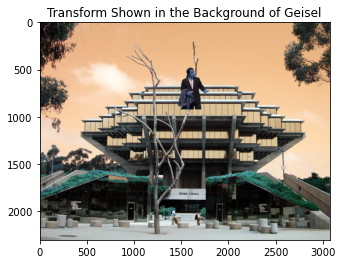

In [34]:
plt.imshow(background)
plt.title('Transform Shown in the Background of Geisel')

## Problem 5. Upsampling and downsampling

#### (i) List (and describe in a short paragraph) 3 interpolation methods.

Neareeat Neighbor Interpolation: It selects the value of the nearest point and does not consider the values of neighboring points at all, yielding a piecewise-constant interpolant.

Bilinear Interpolation: It is performed using linear interpolation first in one direction, and then again in the other direction.It considers the 2x2 pixels to get their weighted average.

Bicubic Interpolation: It is similar to the bilinear interpolation, while it considers 4x4 pixels to calculate their weighted average.

#### (ii) Select 3 color images and downsample using the different methods with the 3 ratios below.What differences do you observe? Which interpolation method do you think works best?

From the results of downsampling 3 different images with different ratios shown below, the performace of neareast neighbor interpolation is the worse that its details are less accurate than others. It is hard to determine whether the bilinear interpolation is better than the bicubic interpolation or not just from observation by eyes.

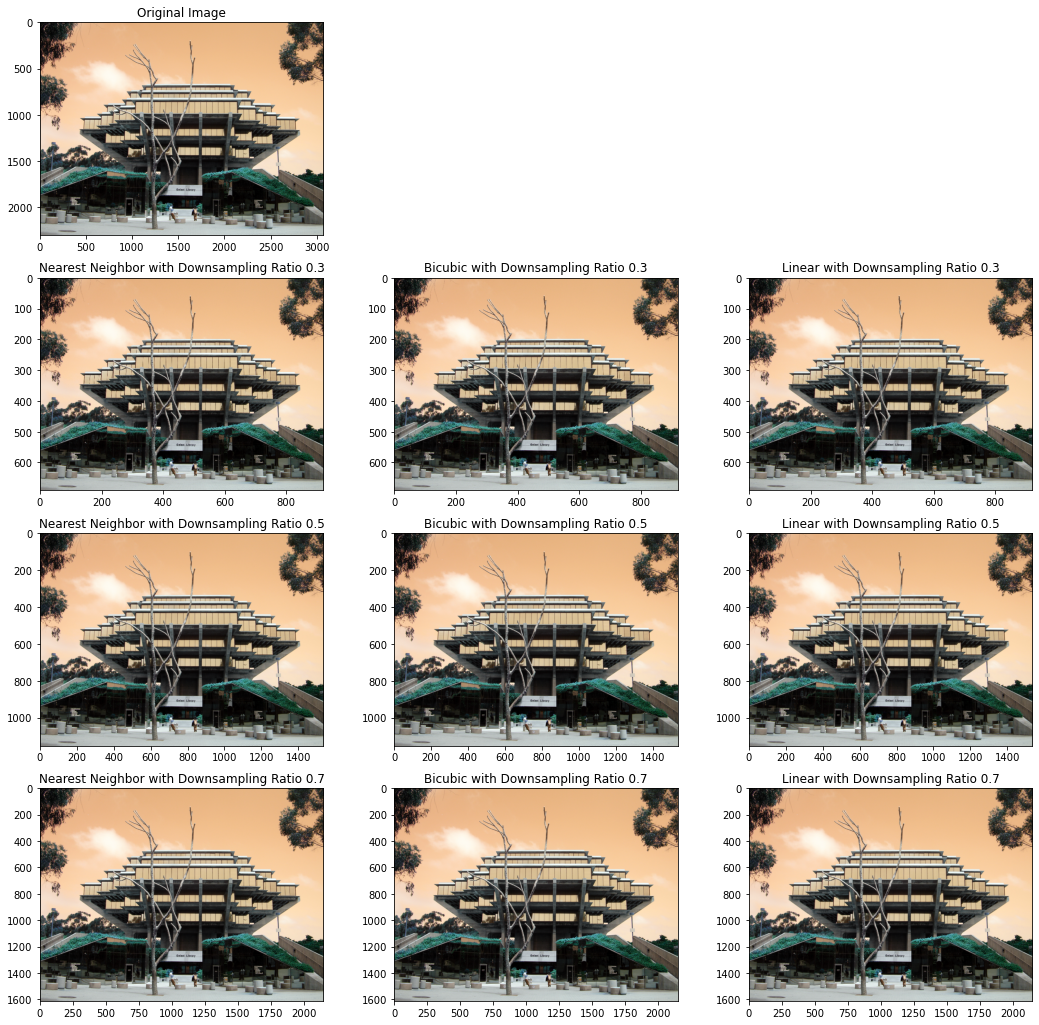

In [53]:
ratios = [0.3, 0.5, 0.7]

img1 = cv2.imread('geisel.jpg')

ref = plt.figure(figsize = (18,18))
reax0 = ref.add_subplot(431)
reax0.imshow(img1)
reax0.title.set_text('Original Image')
i = 4
for r in ratios:
    dim = (int(img1.shape[1]*r), int(img1.shape[0]*r))
    nearest = cv2.resize(img1, dim, interpolation = cv2.INTER_NEAREST)
    bicubic = cv2.resize(img1, dim, interpolation = cv2.INTER_CUBIC)
    linear = cv2.resize(img1, dim, interpolation = cv2.INTER_LINEAR)
    ax1 = ref.add_subplot(4,3,i)
    ax2 = ref.add_subplot(4,3,i+1)
    ax3 = ref.add_subplot(4,3,i+2)
    i += 3
    ax1.title.set_text('Nearest Neighbor with Downsampling Ratio %s'%r)
    ax1.imshow(nearest)
    
    ax2.title.set_text('Bicubic with Downsampling Ratio %s'%r)
    ax2.imshow(bicubic)
    
    ax3.title.set_text('Linear with Downsampling Ratio %s'%r)
    ax3.imshow(linear)

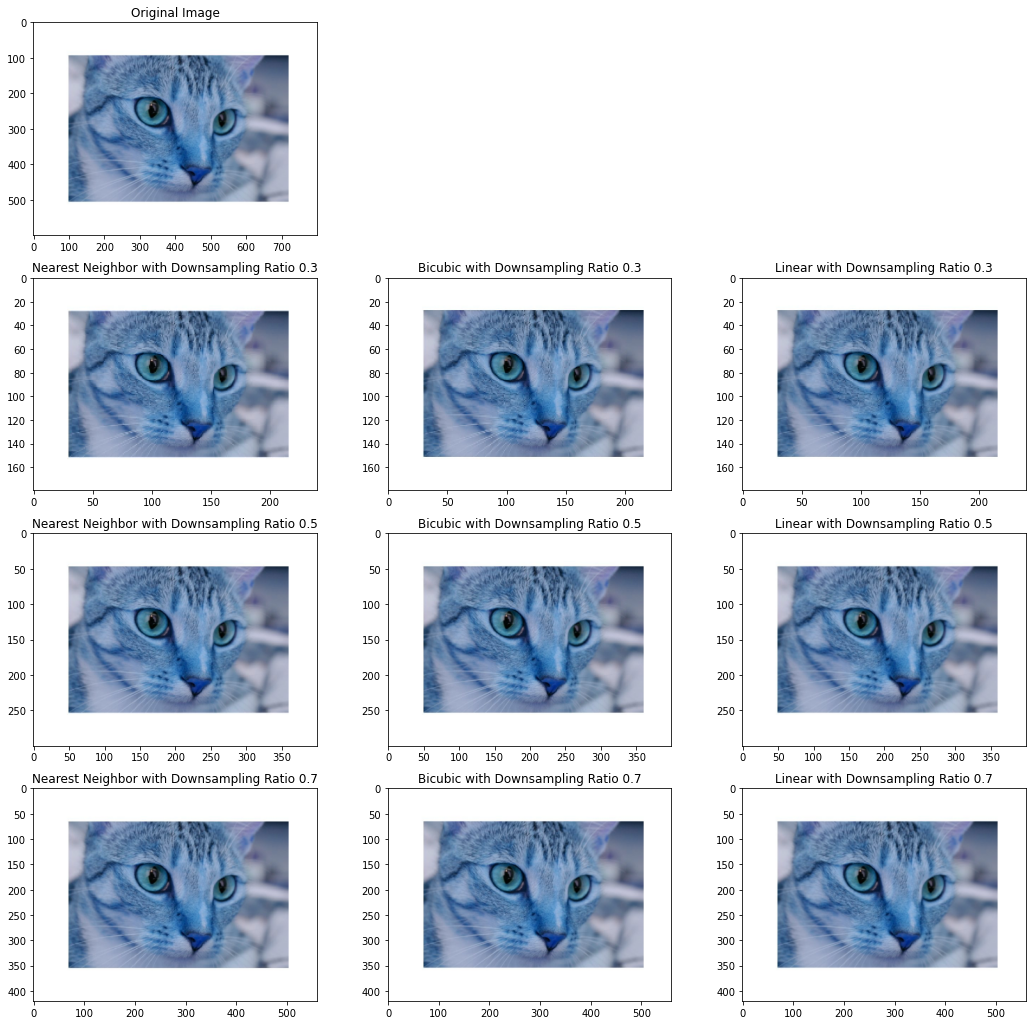

In [54]:
img2 = cv2.imread('cat.jpg')
ref = plt.figure(figsize = (18,18))
reax0 = ref.add_subplot(431)
reax0.imshow(img2)
reax0.title.set_text('Original Image')
i = 4
for r in ratios:
    dim = (int(img2.shape[1]*r), int(img2.shape[0]*r))
    nearest = cv2.resize(img2, dim, interpolation = cv2.INTER_NEAREST)
    bicubic = cv2.resize(img2, dim, interpolation = cv2.INTER_CUBIC)
    linear = cv2.resize(img2, dim, interpolation = cv2.INTER_LINEAR)
    ax1 = ref.add_subplot(4,3,i)
    ax2 = ref.add_subplot(4,3,i+1)
    ax3 = ref.add_subplot(4,3,i+2)
    i += 3
    ax1.title.set_text('Nearest Neighbor with Downsampling Ratio %s'%r)
    ax1.imshow(nearest)
    
    ax2.title.set_text('Bicubic with Downsampling Ratio %s'%r)
    ax2.imshow(bicubic)
    
    ax3.title.set_text('Linear with Downsampling Ratio %s'%r)
    ax3.imshow(linear)

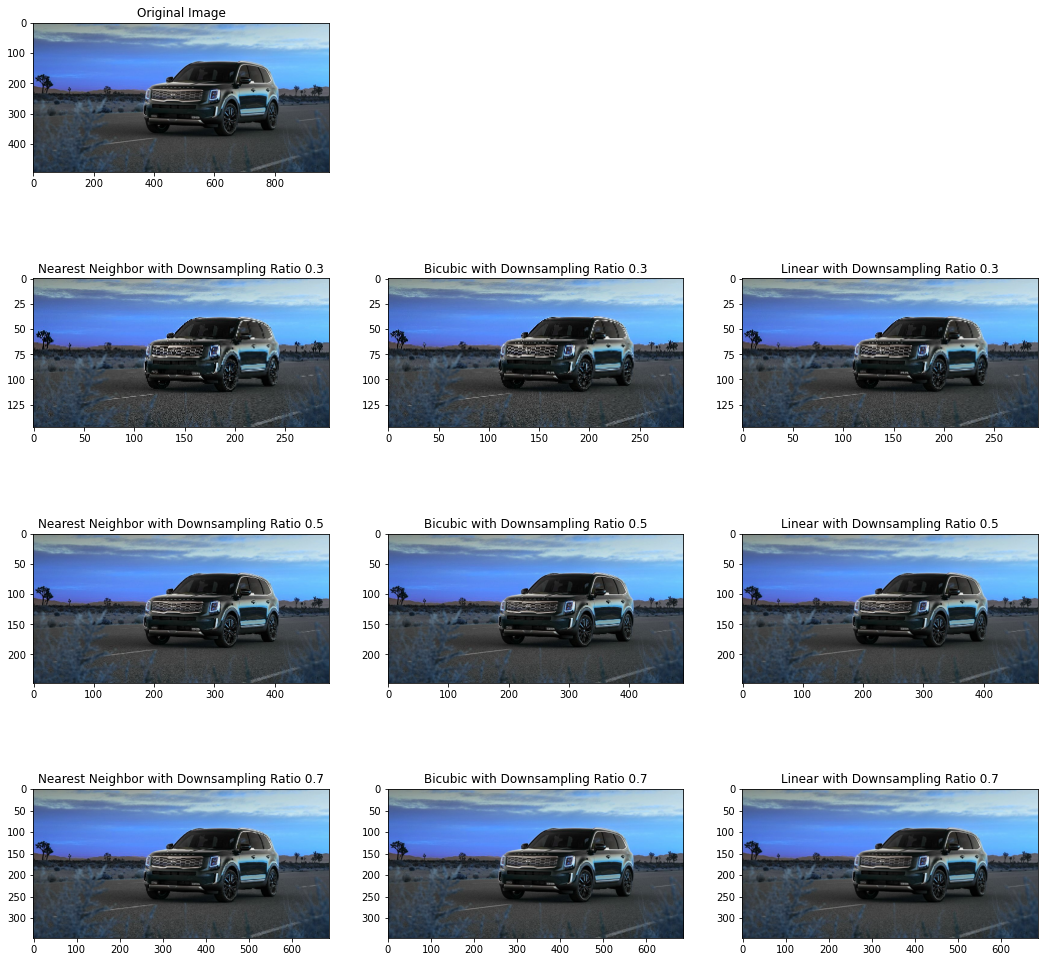

In [55]:
img3 = cv2.imread('car.jpg')
ref = plt.figure(figsize = (18,18))
reax0 = ref.add_subplot(431)
reax0.imshow(img3)
reax0.title.set_text('Original Image')
i = 4
for r in ratios:
    dim = (int(img3.shape[1]*r), int(img3.shape[0]*r))
    nearest = cv2.resize(img3, dim, interpolation = cv2.INTER_NEAREST)
    bicubic = cv2.resize(img3, dim, interpolation = cv2.INTER_CUBIC)
    linear = cv2.resize(img3, dim, interpolation = cv2.INTER_LINEAR)
    ax1 = ref.add_subplot(4,3,i)
    ax2 = ref.add_subplot(4,3,i+1)
    ax3 = ref.add_subplot(4,3,i+2)
    i += 3
    ax1.title.set_text('Nearest Neighbor with Downsampling Ratio %s'%r)
    ax1.imshow(nearest)
    
    ax2.title.set_text('Bicubic with Downsampling Ratio %s'%r)
    ax2.imshow(bicubic)
    
    ax3.title.set_text('Linear with Downsampling Ratio %s'%r)
    ax3.imshow(linear)

#### (iii) Repeat the previous step, but this time use upsampling with the ratios below. What differences do you observe? What interpolation method works best?

As the results shown below, the performace of the nearest neighbor interpolation is the worse as well. The performances of the other two interpolations are smoother in some areas than the one of the nearest neighbor interpolation. 

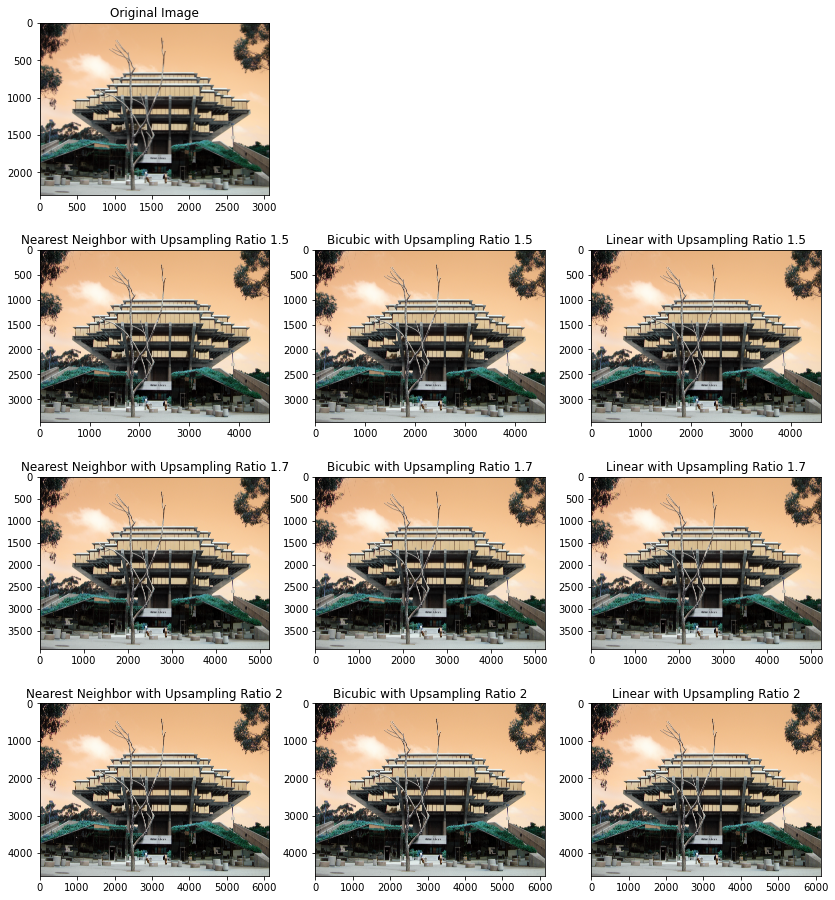

In [38]:
upRatios = [1.5,1.7, 2]

ref = plt.figure(figsize = (14,16))
reax0 = ref.add_subplot(431)
reax0.imshow(img1)
reax0.title.set_text('Original Image')
i = 4
for ur in upRatios:
    dim = (int(img1.shape[1]*ur), int(img1.shape[0]*ur))
    nearest = cv2.resize(img1, dim, interpolation = cv2.INTER_NEAREST)
    bicubic = cv2.resize(img1, dim, interpolation = cv2.INTER_CUBIC)
    linear = cv2.resize(img1, dim, interpolation = cv2.INTER_LINEAR)
    ax1 = ref.add_subplot(4,3,i)
    ax2 = ref.add_subplot(4,3,i+1)
    ax3 = ref.add_subplot(4,3,i+2)
    i += 3
    ax1.title.set_text('Nearest Neighbor with Upsampling Ratio %s'%ur)
    ax1.imshow(nearest)
    
    ax2.title.set_text('Bicubic with Upsampling Ratio %s'%ur)
    ax2.imshow(bicubic)
    
    ax3.title.set_text('Linear with Upsampling Ratio %s'%ur)
    ax3.imshow(linear)

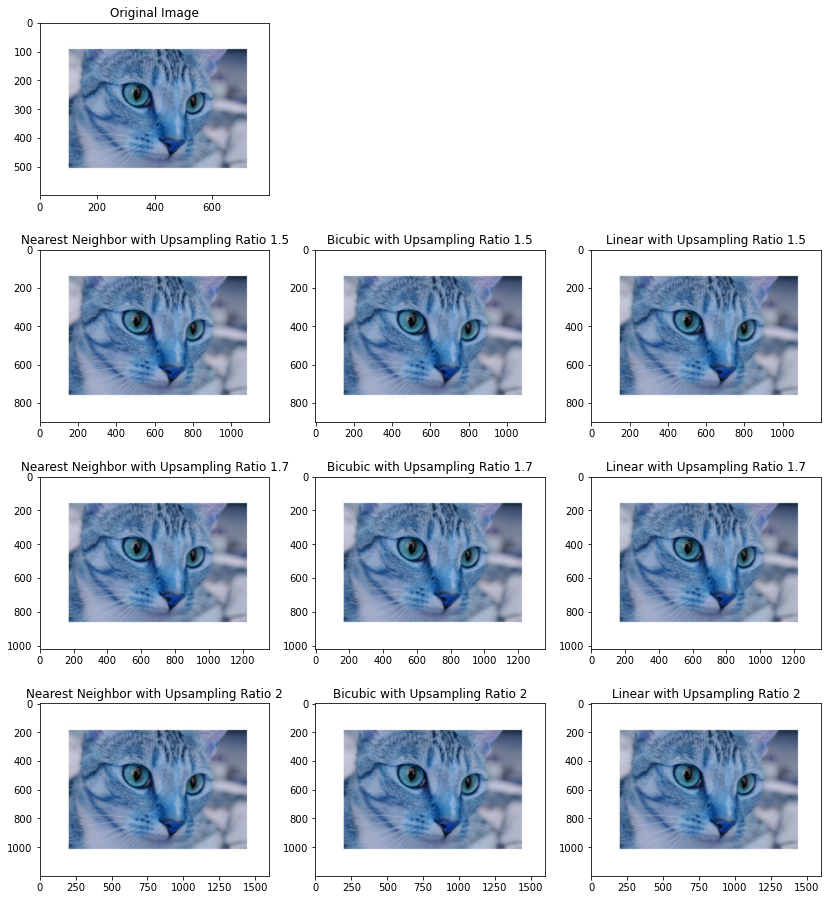

In [39]:
ref = plt.figure(figsize = (14,16))
reax0 = ref.add_subplot(431)
reax0.imshow(img2)
reax0.title.set_text('Original Image')
i = 4
for ur in upRatios:
    dim = (int(img2.shape[1]*ur), int(img2.shape[0]*ur))
    nearest = cv2.resize(img2, dim, interpolation = cv2.INTER_NEAREST)
    bicubic = cv2.resize(img2, dim, interpolation = cv2.INTER_CUBIC)
    linear = cv2.resize(img2, dim, interpolation = cv2.INTER_LINEAR)
    ax1 = ref.add_subplot(4,3,i)
    ax2 = ref.add_subplot(4,3,i+1)
    ax3 = ref.add_subplot(4,3,i+2)
    i += 3
    ax1.title.set_text('Nearest Neighbor with Upsampling Ratio %s'%ur)
    ax1.imshow(nearest)
    
    ax2.title.set_text('Bicubic with Upsampling Ratio %s'%ur)
    ax2.imshow(bicubic)
    
    ax3.title.set_text('Linear with Upsampling Ratio %s'%ur)
    ax3.imshow(linear)

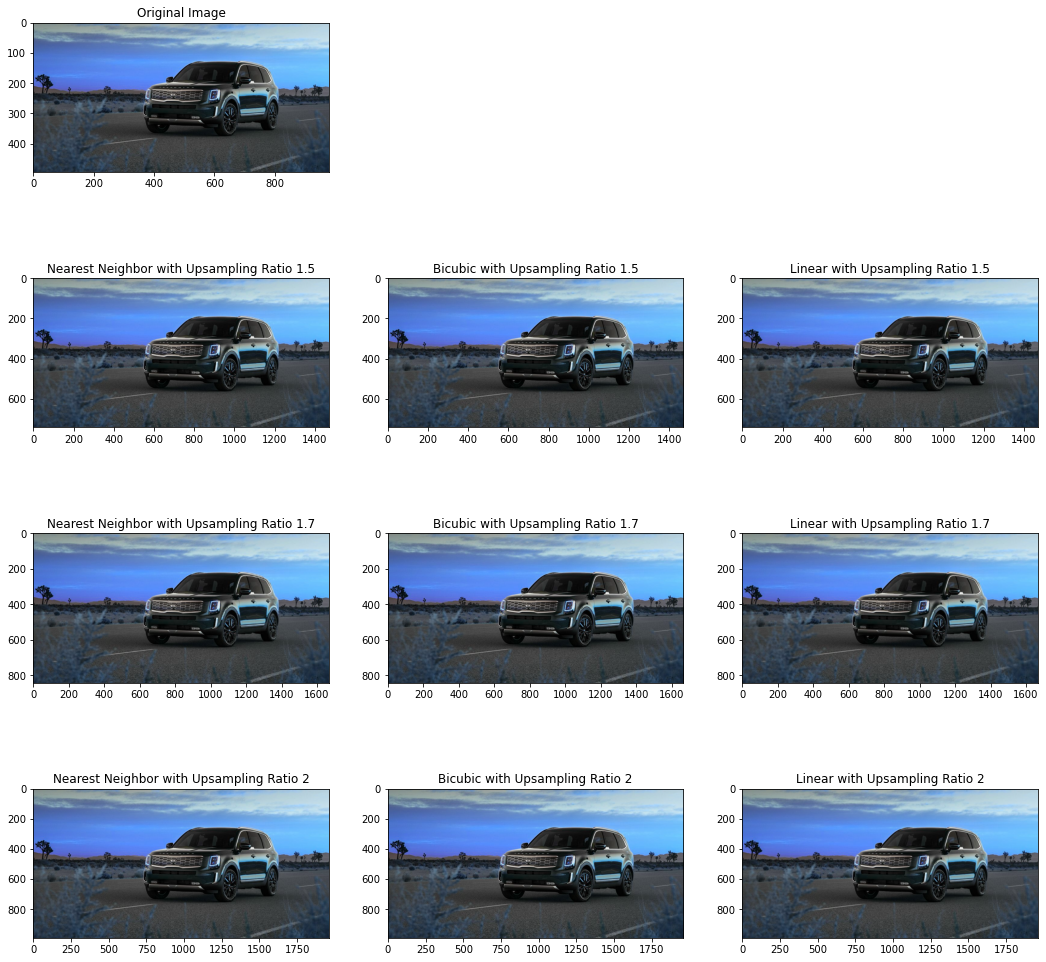

In [51]:
ref = plt.figure(figsize = (18,18))
reax0 = ref.add_subplot(431)
reax0.imshow(img3)
reax0.title.set_text('Original Image')
i = 4
for ur in upRatios:
    dim = (int(img3.shape[1]*ur), int(img3.shape[0]*ur))
    nearest = cv2.resize(img3, dim, interpolation = cv2.INTER_NEAREST)
    bicubic = cv2.resize(img3, dim, interpolation = cv2.INTER_CUBIC)
    linear = cv2.resize(img3, dim, interpolation = cv2.INTER_LINEAR)
    ax1 = ref.add_subplot(4,3,i)
    ax2 = ref.add_subplot(4,3,i+1)
    ax3 = ref.add_subplot(4,3,i+2)
    i += 3
    ax1.title.set_text('Nearest Neighbor with Upsampling Ratio %s'%ur)
    ax1.imshow(nearest)
    
    ax2.title.set_text('Bicubic with Upsampling Ratio %s'%ur)
    ax2.imshow(bicubic)
    
    ax3.title.set_text('Linear with Upsampling Ratio %s'%ur)
    ax3.imshow(linear)

#### Using 3 color images, downsample the images with scale 0.1 and upsample back to the original size, using all combinations of the three chosen interpolation methods. Which interpolation combination do you think works best to reconstruct the original image?

From the results shown below, there are two interpolations combinations that work better to reconstruct the image than the rest of seven combinations do. These two combinations are: (1) downsampling by bilinear interpolation and upsampling by bicubic interpolation; (2) downsampling by bilinear interpolation and upsampling also by bilinear interpolation.

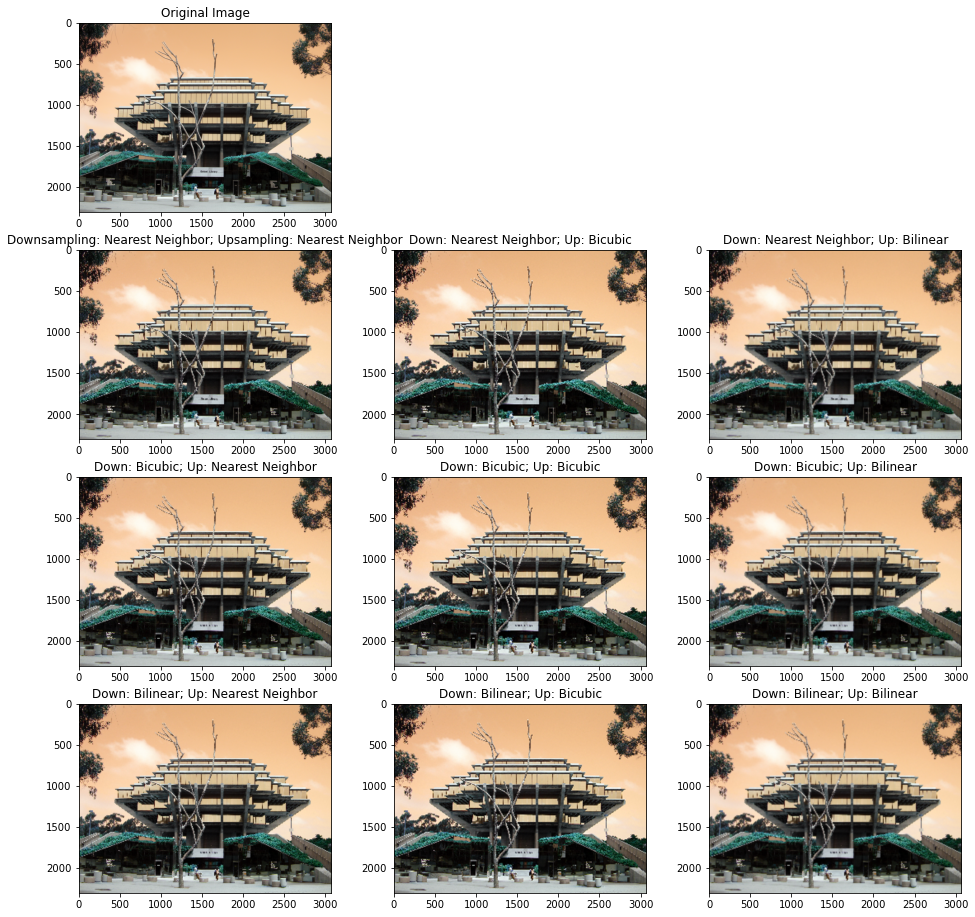

In [67]:
ref = plt.figure(figsize = (16,16))
reax0 = ref.add_subplot(431)
reax0.imshow(img1)
reax0.title.set_text('Original Image')


dim1 = (int(img1.shape[1]*0.1), int(img1.shape[0]*0.1))
nearest = cv2.resize(img1, dim1, interpolation = cv2.INTER_NEAREST)
bicubic = cv2.resize(img1, dim1, interpolation = cv2.INTER_CUBIC)
linear = cv2.resize(img1, dim1, interpolation = cv2.INTER_LINEAR)

dim2 = (int(nearest.shape[1]*10), int(nearest.shape[0]*10))

nearest1 = cv2.resize(nearest, dim2, interpolation = cv2.INTER_NEAREST)
nearest2 = cv2.resize(nearest, dim2, interpolation = cv2.INTER_CUBIC)
nearest3 = cv2.resize(nearest, dim2, interpolation = cv2.INTER_LINEAR)

bicubic1 = cv2.resize(bicubic, dim2, interpolation = cv2.INTER_NEAREST)
bicubic2 = cv2.resize(bicubic, dim2, interpolation = cv2.INTER_CUBIC)
bicubic3 = cv2.resize(bicubic, dim2, interpolation = cv2.INTER_LINEAR)

linear1 = cv2.resize(linear, dim2, interpolation = cv2.INTER_NEAREST)
linear2 = cv2.resize(linear, dim2, interpolation = cv2.INTER_CUBIC)
linear3 = cv2.resize(linear, dim2, interpolation = cv2.INTER_LINEAR)

ax1 = ref.add_subplot(4,3,4)
ax1.title.set_text('Downsampling: Nearest Neighbor; Upsampling: Nearest Neighbor')
ax1.imshow(nearest1)

ax2 = ref.add_subplot(4,3,5)
ax2.title.set_text('Down: Nearest Neighbor; Up: Bicubic')
ax2.imshow(nearest2)

ax3 = ref.add_subplot(4,3,6)
ax3.title.set_text('Down: Nearest Neighbor; Up: Bilinear')
ax3.imshow(nearest3)

    
ax4 = ref.add_subplot(4,3,7)
ax4.title.set_text('Down: Bicubic; Up: Nearest Neighbor')
ax4.imshow(bicubic1)

ax5 = ref.add_subplot(4,3,8)
ax5.title.set_text('Down: Bicubic; Up: Bicubic')
ax5.imshow(bicubic2)

ax6 = ref.add_subplot(4,3,9)
ax6.title.set_text('Down: Bicubic; Up: Bilinear')
ax6.imshow(bicubic3)

ax7 = ref.add_subplot(4,3,10)
ax7.title.set_text('Down: Bilinear; Up: Nearest Neighbor')
ax7.imshow(linear1)

ax8 = ref.add_subplot(4,3,11)
ax8.title.set_text('Down: Bilinear; Up: Bicubic')
ax8.imshow(linear2)

ax9 = ref.add_subplot(4,3,12)
ax9.title.set_text('Down: Bilinear; Up: Bilinear')
ax9.imshow(linear3)

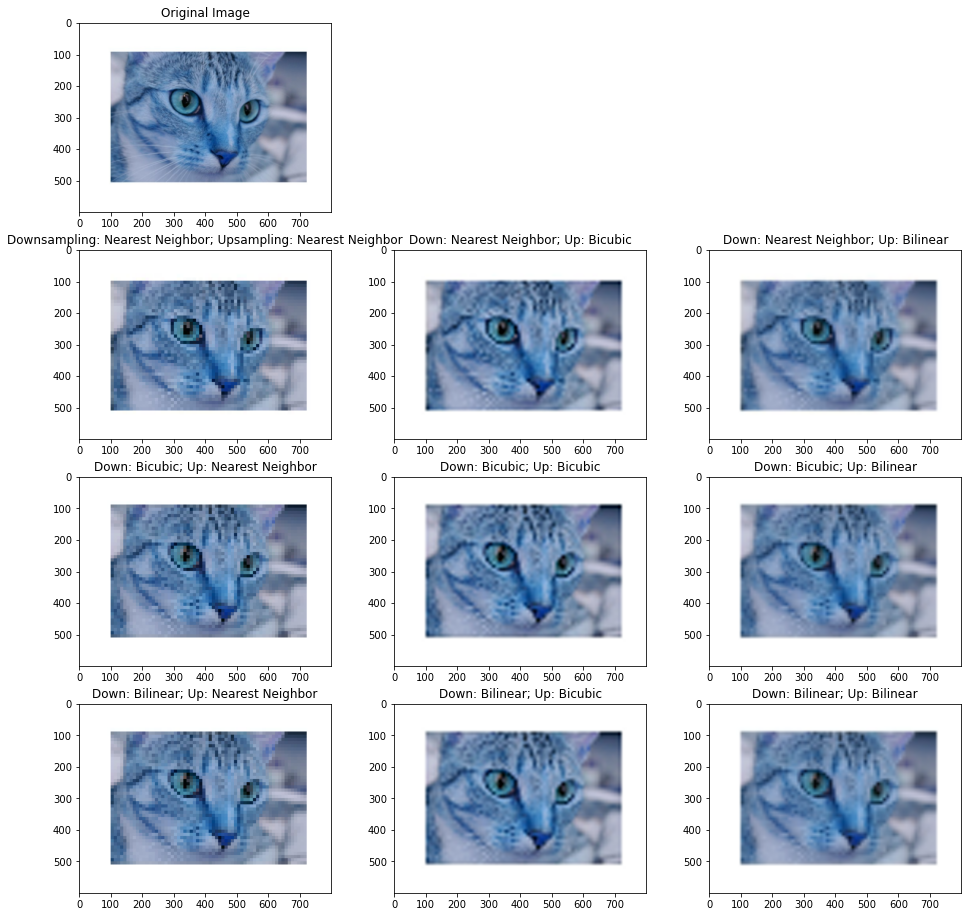

In [68]:
ref = plt.figure(figsize = (16,16))
reax0 = ref.add_subplot(431)
reax0.imshow(img2)
reax0.title.set_text('Original Image')


dim1 = (int(img2.shape[1]*0.1), int(img2.shape[0]*0.1))
nearest = cv2.resize(img2, dim1, interpolation = cv2.INTER_NEAREST)
bicubic = cv2.resize(img2, dim1, interpolation = cv2.INTER_CUBIC)
linear = cv2.resize(img2, dim1, interpolation = cv2.INTER_LINEAR)

dim2 = (int(nearest.shape[1]*10), int(nearest.shape[0]*10))

nearest1 = cv2.resize(nearest, dim2, interpolation = cv2.INTER_NEAREST)
nearest2 = cv2.resize(nearest, dim2, interpolation = cv2.INTER_CUBIC)
nearest3 = cv2.resize(nearest, dim2, interpolation = cv2.INTER_LINEAR)

bicubic1 = cv2.resize(bicubic, dim2, interpolation = cv2.INTER_NEAREST)
bicubic2 = cv2.resize(bicubic, dim2, interpolation = cv2.INTER_CUBIC)
bicubic3 = cv2.resize(bicubic, dim2, interpolation = cv2.INTER_LINEAR)

linear1 = cv2.resize(linear, dim2, interpolation = cv2.INTER_NEAREST)
linear2 = cv2.resize(linear, dim2, interpolation = cv2.INTER_CUBIC)
linear3 = cv2.resize(linear, dim2, interpolation = cv2.INTER_LINEAR)

ax1 = ref.add_subplot(4,3,4)
ax1.title.set_text('Downsampling: Nearest Neighbor; Upsampling: Nearest Neighbor')
ax1.imshow(nearest1)

ax2 = ref.add_subplot(4,3,5)
ax2.title.set_text('Down: Nearest Neighbor; Up: Bicubic')
ax2.imshow(nearest2)

ax3 = ref.add_subplot(4,3,6)
ax3.title.set_text('Down: Nearest Neighbor; Up: Bilinear')
ax3.imshow(nearest3)

    
ax4 = ref.add_subplot(4,3,7)
ax4.title.set_text('Down: Bicubic; Up: Nearest Neighbor')
ax4.imshow(bicubic1)

ax5 = ref.add_subplot(4,3,8)
ax5.title.set_text('Down: Bicubic; Up: Bicubic')
ax5.imshow(bicubic2)

ax6 = ref.add_subplot(4,3,9)
ax6.title.set_text('Down: Bicubic; Up: Bilinear')
ax6.imshow(bicubic3)

ax7 = ref.add_subplot(4,3,10)
ax7.title.set_text('Down: Bilinear; Up: Nearest Neighbor')
ax7.imshow(linear1)

ax8 = ref.add_subplot(4,3,11)
ax8.title.set_text('Down: Bilinear; Up: Bicubic')
ax8.imshow(linear2)

ax9 = ref.add_subplot(4,3,12)
ax9.title.set_text('Down: Bilinear; Up: Bilinear')
ax9.imshow(linear3)

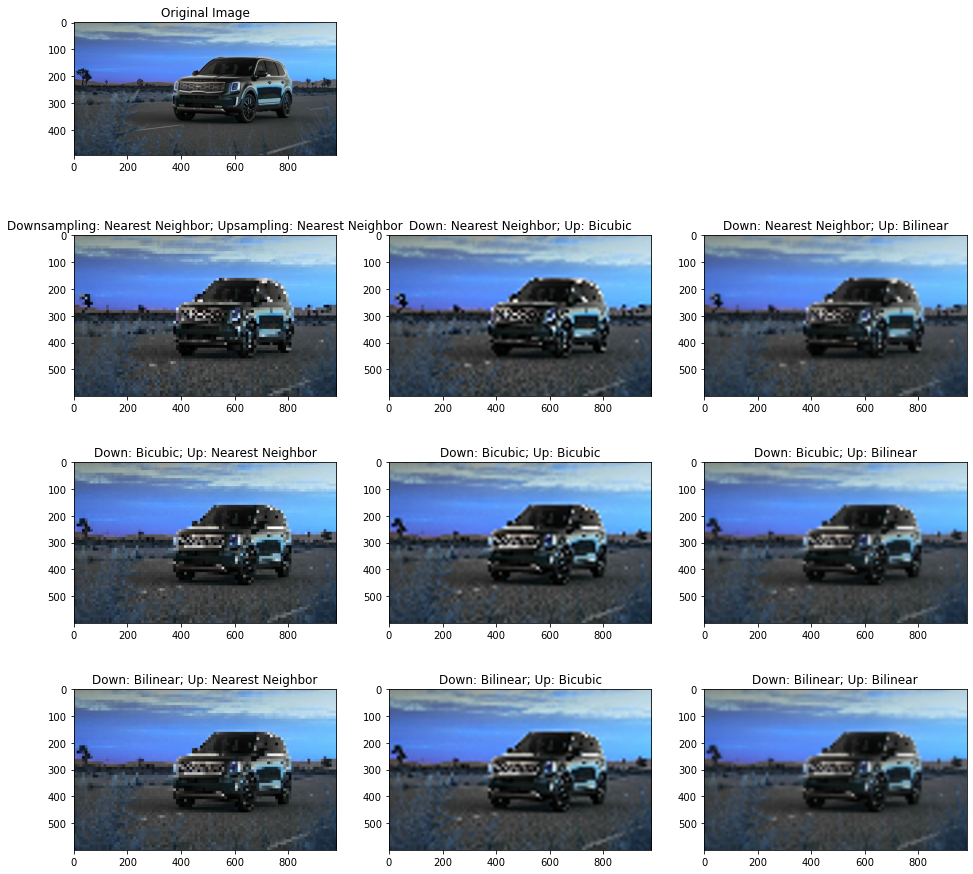

In [69]:
ref = plt.figure(figsize = (16,16))
reax0 = ref.add_subplot(431)
reax0.imshow(img3)
reax0.title.set_text('Original Image')


dim1 = (int(img3.shape[1]*0.1), int(img2.shape[0]*0.1))
nearest = cv2.resize(img3, dim1, interpolation = cv2.INTER_NEAREST)
bicubic = cv2.resize(img3, dim1, interpolation = cv2.INTER_CUBIC)
linear = cv2.resize(img3, dim1, interpolation = cv2.INTER_LINEAR)

dim2 = (int(nearest.shape[1]*10), int(nearest.shape[0]*10))

nearest1 = cv2.resize(nearest, dim2, interpolation = cv2.INTER_NEAREST)
nearest2 = cv2.resize(nearest, dim2, interpolation = cv2.INTER_CUBIC)
nearest3 = cv2.resize(nearest, dim2, interpolation = cv2.INTER_LINEAR)

bicubic1 = cv2.resize(bicubic, dim2, interpolation = cv2.INTER_NEAREST)
bicubic2 = cv2.resize(bicubic, dim2, interpolation = cv2.INTER_CUBIC)
bicubic3 = cv2.resize(bicubic, dim2, interpolation = cv2.INTER_LINEAR)

linear1 = cv2.resize(linear, dim2, interpolation = cv2.INTER_NEAREST)
linear2 = cv2.resize(linear, dim2, interpolation = cv2.INTER_CUBIC)
linear3 = cv2.resize(linear, dim2, interpolation = cv2.INTER_LINEAR)

ax1 = ref.add_subplot(4,3,4)
ax1.title.set_text('Downsampling: Nearest Neighbor; Upsampling: Nearest Neighbor')
ax1.imshow(nearest1)

ax2 = ref.add_subplot(4,3,5)
ax2.title.set_text('Down: Nearest Neighbor; Up: Bicubic')
ax2.imshow(nearest2)

ax3 = ref.add_subplot(4,3,6)
ax3.title.set_text('Down: Nearest Neighbor; Up: Bilinear')
ax3.imshow(nearest3)

    
ax4 = ref.add_subplot(4,3,7)
ax4.title.set_text('Down: Bicubic; Up: Nearest Neighbor')
ax4.imshow(bicubic1)

ax5 = ref.add_subplot(4,3,8)
ax5.title.set_text('Down: Bicubic; Up: Bicubic')
ax5.imshow(bicubic2)

ax6 = ref.add_subplot(4,3,9)
ax6.title.set_text('Down: Bicubic; Up: Bilinear')
ax6.imshow(bicubic3)

ax7 = ref.add_subplot(4,3,10)
ax7.title.set_text('Down: Bilinear; Up: Nearest Neighbor')
ax7.imshow(linear1)

ax8 = ref.add_subplot(4,3,11)
ax8.title.set_text('Down: Bilinear; Up: Bicubic')
ax8.imshow(linear2)

ax9 = ref.add_subplot(4,3,12)
ax9.title.set_text('Down: Bilinear; Up: Bilinear')
ax9.imshow(linear3)